In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/House_1_cleaned_named.csv")
df.head()


,Time,Unix,Aggregate,Fridge,Freezer,Washing_Machine,Dishwasher,Computer,Television,Microwave,Kettle,Toaster,active_count
0,2013-10-09 13:06:17,1381323977,523,74,0,69,0,0,0,0,0,1,3
1,2013-10-09 13:07:59,1381324079,561,74,0,69,0,0,0,0,0,1,3
2,2013-10-09 14:11:32,1381327892,445,12,0,71,0,0,0,0,0,1,3
3,2013-10-09 14:19:59,1381328399,613,0,60,70,0,0,0,0,0,1,3
4,2013-10-09 14:20:59,1381328459,536,0,51,70,0,0,0,0,0,1,3


In [2]:
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)


In [3]:
appliance_cols = [
    'Fridge', 'Freezer', 'Washing_Machine', 'Dishwasher',
    'Computer', 'Television', 'Microwave', 'Kettle', 'Toaster'
]


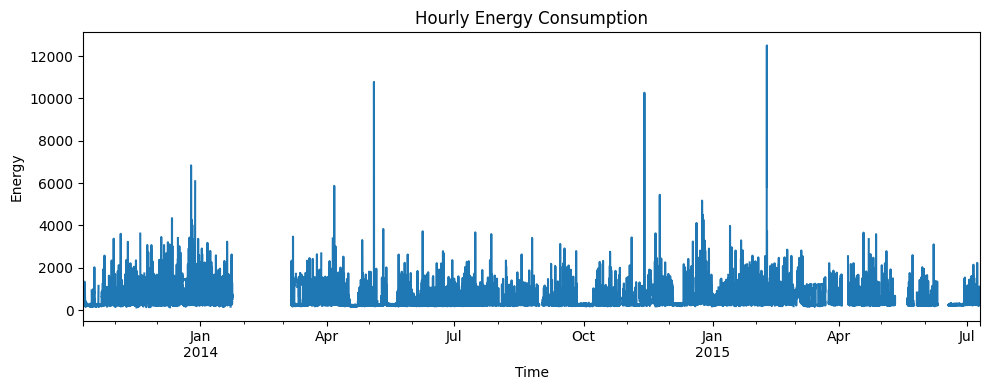

In [4]:
hourly = df['Aggregate'].resample('h').mean()

plt.figure(figsize=(10,4))
hourly.plot()
plt.title("Hourly Energy Consumption")
plt.ylabel("Energy")
plt.tight_layout()
plt.show()


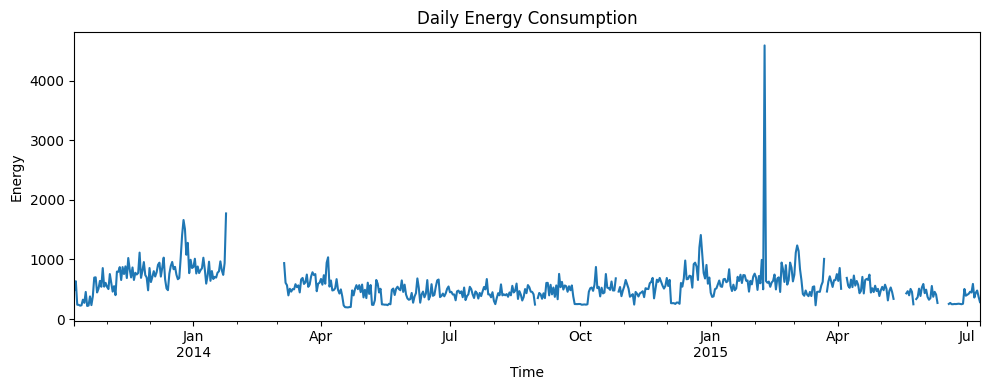

In [5]:
daily = df['Aggregate'].resample('D').mean()

plt.figure(figsize=(10,4))
daily.plot()
plt.title("Daily Energy Consumption")
plt.ylabel("Energy")
plt.tight_layout()
plt.show()


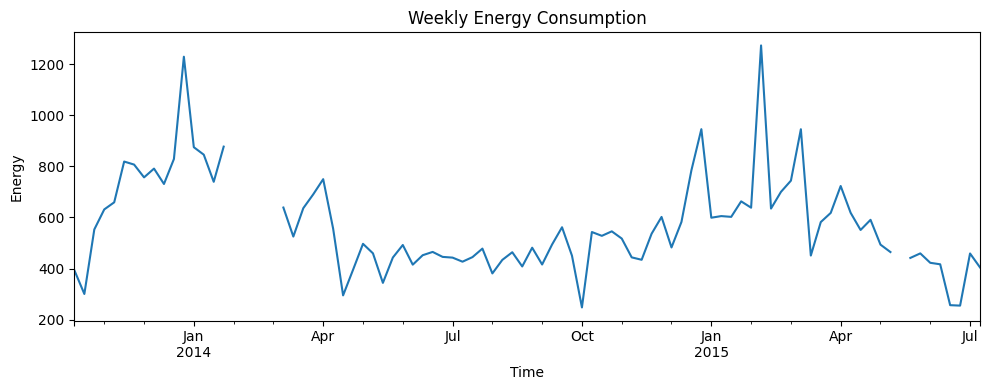

In [6]:
weekly = df['Aggregate'].resample('W').mean()

plt.figure(figsize=(10,4))
weekly.plot()
plt.title("Weekly Energy Consumption")
plt.ylabel("Energy")
plt.tight_layout()
plt.show()


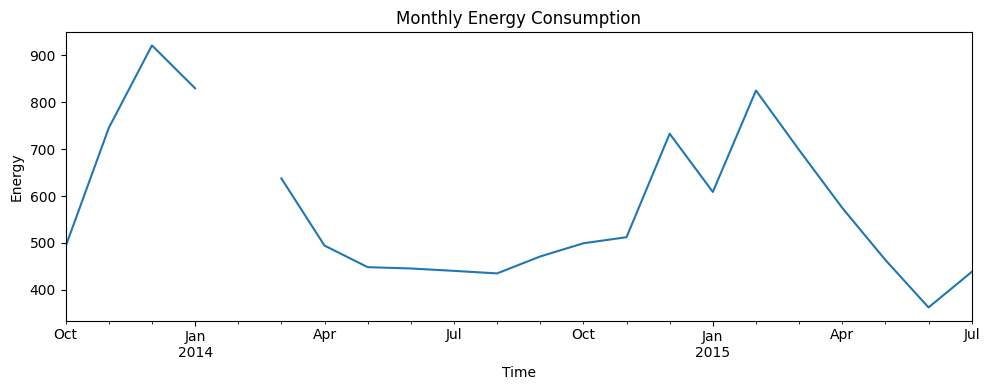

In [8]:
monthly = df['Aggregate'].resample('ME').mean()

plt.figure(figsize=(10,4))
monthly.plot()
plt.title("Monthly Energy Consumption")
plt.ylabel("Energy")
plt.tight_layout()
plt.show()


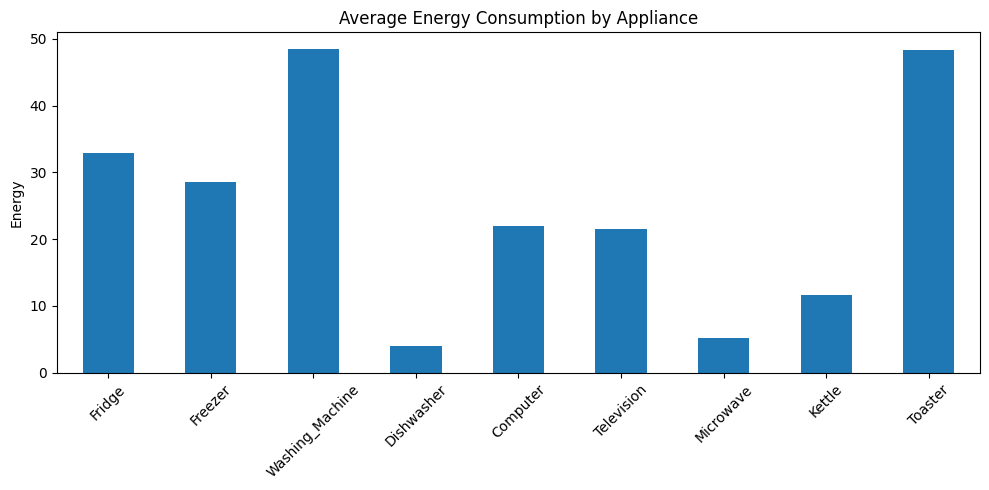

In [9]:
appliance_usage = df[appliance_cols].mean()

plt.figure(figsize=(10,5))
appliance_usage.plot(kind='bar')
plt.title("Average Energy Consumption by Appliance")
plt.ylabel("Energy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


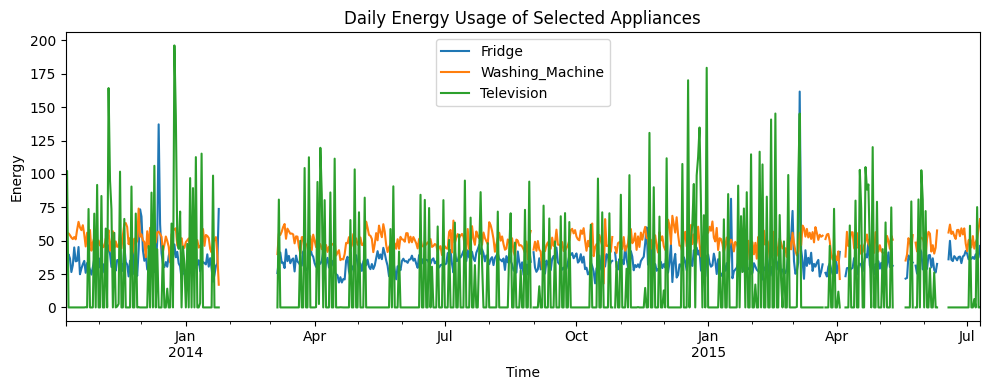

In [14]:
df[['Fridge', 'Washing_Machine', 'Television']].resample('D').mean().plot(figsize=(10,4))
plt.title("Daily Energy Usage of Selected Appliances")
plt.ylabel("Energy")
plt.tight_layout()
plt.show()


In [15]:
suggestions = []

if df['Kettle'].mean() > df['Kettle'].quantile(0.75):
    suggestions.append("High kettle usage detected. Consider boiling only required water.")

if df['Television'].mean() > df['Television'].quantile(0.75):
    suggestions.append("Television usage is high. Turn off when not actively watching.")

if df['Fridge'].mean() > df['Fridge'].quantile(0.75):
    suggestions.append("Fridge consumption is high. Ensure door seals are tight and temperature is optimal.")

if len(suggestions) == 0:
    suggestions.append("Energy usage is within efficient limits. Good job!")


In [16]:
for s in suggestions:
    print("-", s)


- Television usage is high. Turn off when not actively watching.
